# Análise Exploratória de Dados (EDA)
## Sistema de Predição de Evasão Estudantil

Este notebook realiza uma análise exploratória completa dos dados de estudantes para identificar padrões relacionados à evasão.


In [1]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


## 1. Carregamento dos Dados


In [2]:
# Carregar dataset
df = pd.read_csv('../data/student_dropout_dataset.csv')

print(f"📊 Dimensões do dataset: {df.shape}")
print(f"\n📋 Primeiras linhas:")
df.head()


📊 Dimensões do dataset: (1000, 23)

📋 Primeiras linhas:


,student_id,age,gender,socioeconomic_level,avg_grade,avg_attendance,current_semester,total_enrollments,failed_courses,completed_courses,...,days_since_last_interaction,engagement_score,scholarship_percentage,overdue_payments,pending_payments,outstanding_amount,dropout,success_rate,failure_rate,interaction_per_enrollment
0,STU0001,23,M,2,5.589950,65.399317,4,18,0,17,...,0.990937,63.430633,50,0,0,0.000000,0,94.444444,0.000000,2.888889
1,STU0002,21,M,1,6.816926,95.107000,2,9,1,7,...,3.952350,56.330327,50,0,0,0.000000,0,77.777778,11.111111,5.000000
2,STU0003,23,F,2,8.300118,85.042174,4,15,1,14,...,9.007054,39.108292,50,1,1,2813.122411,0,93.333333,6.666667,1.933333
3,STU0004,26,F,3,5.762146,76.587856,3,14,1,11,...,1.802876,55.431179,0,1,0,1856.315470,0,78.571429,7.142857,3.214286
4,STU0005,21,M,4,3.685171,67.640968,5,19,0,18,...,8.938384,50.296842,25,0,0,0.000000,0,94.736842,0.000000,2.947368


## 2. Informações Gerais do Dataset


In [3]:
# Informações sobre o dataset
print("📊 Informações do Dataset:")
print(f"Total de registros: {len(df)}")
print(f"Total de features: {len(df.columns) - 1}")
print(f"\n📈 Distribuição da variável target (dropout):")
print(df['dropout'].value_counts())
print(f"\n📊 Taxa de evasão: {df['dropout'].mean()*100:.2f}%")

# Tipos de dados
print("\n🔍 Tipos de dados:")
print(df.dtypes)


📊 Informações do Dataset:
Total de registros: 1000
Total de features: 22

📈 Distribuição da variável target (dropout):
dropout
0    873
1    127
Name: count, dtype: int64

📊 Taxa de evasão: 12.70%

🔍 Tipos de dados:
student_id                      object
age                              int64
gender                          object
socioeconomic_level              int64
avg_grade                      float64
avg_attendance                 float64
current_semester                 int64
total_enrollments                int64
failed_courses                   int64
completed_courses                int64
total_interactions               int64
unique_sessions_count            int64
total_duration_hours           float64
days_since_last_interaction    float64
engagement_score               float64
scholarship_percentage           int64
overdue_payments                 int64
pending_payments                 int64
outstanding_amount             float64
dropout                          int64
succ

In [4]:
# Estatísticas descritivas
print("📊 Estatísticas Descritivas:")
df.describe()


📊 Estatísticas Descritivas:


,age,socioeconomic_level,avg_grade,avg_attendance,current_semester,total_enrollments,failed_courses,completed_courses,total_interactions,unique_sessions_count,...,days_since_last_interaction,engagement_score,scholarship_percentage,overdue_payments,pending_payments,outstanding_amount,dropout,success_rate,failure_rate,interaction_per_enrollment
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,21.7060,3.129000,6.506817,78.584895,2.731000,10.817000,0.514000,9.33500,49.769000,15.057000,...,4.663440,55.212823,37.10000,0.306000,0.525000,1049.524494,0.12700,79.728531,7.253485,7.005444
std,2.7009,1.199082,1.529571,13.793041,1.482173,6.020611,0.728241,6.06643,6.856869,3.847669,...,4.780585,10.740040,33.42465,0.571569,0.701332,1277.235678,0.33314,22.387145,14.229070,5.634620
min,18.0000,1.000000,2.013296,34.885515,1.000000,2.000000,0.000000,0.00000,29.000000,3.000000,...,0.002116,28.879565,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.458333
25%,20.0000,2.000000,5.438038,69.124820,1.000000,6.000000,0.000000,4.00000,45.000000,12.000000,...,1.230489,47.806446,0.00000,0.000000,0.000000,0.000000,0.00000,71.428571,0.000000,3.250000
50%,22.0000,3.000000,6.521088,79.483004,2.000000,10.000000,0.000000,8.00000,50.000000,15.000000,...,3.271315,54.615471,25.00000,0.000000,0.000000,807.122235,0.00000,85.714286,0.000000,5.000000
75%,23.0000,4.000000,7.532720,88.768407,4.000000,15.000000,1.000000,14.00000,54.000000,17.000000,...,6.337444,61.830354,56.25000,1.000000,1.000000,1647.360287,0.00000,94.736842,10.000000,8.723214
max,33.0000,5.000000,10.000000,100.000000,6.000000,26.000000,4.000000,25.00000,73.000000,29.000000,...,30.000000,98.584367,100.00000,4.000000,4.000000,9287.442105,1.00000,100.000000,150.000000,32.500000


In [5]:
# Verificar valores ausentes
print("🔍 Valores Ausentes:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Ausentes': missing,
    'Percentual (%)': missing_percent
})
missing_df[missing_df['Valores Ausentes'] > 0]


🔍 Valores Ausentes:


,Valores Ausentes,Percentual (%)


## 3. Análise da Variável Target


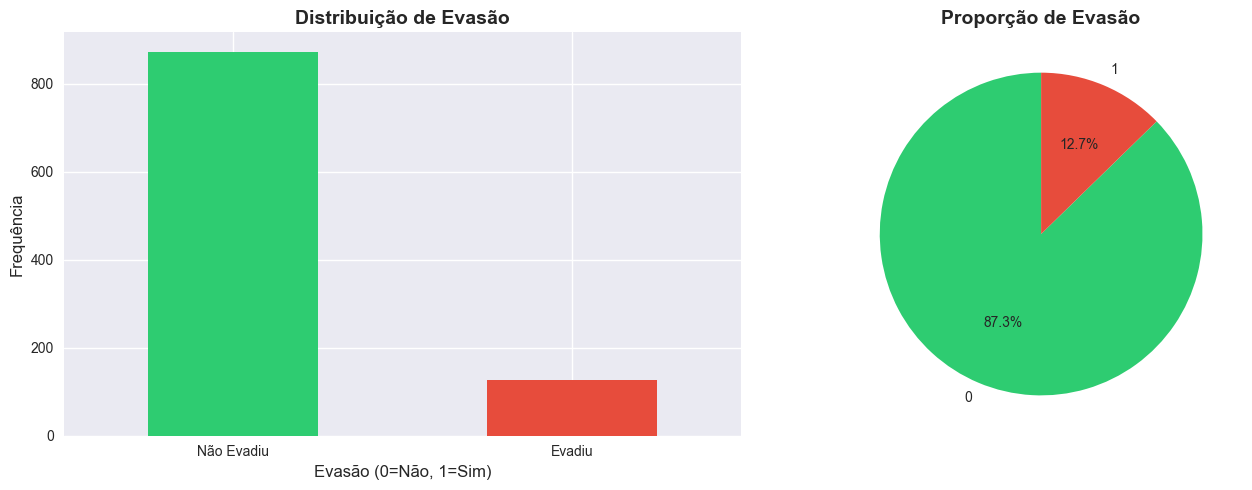

In [6]:
# Distribuição da variável target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
df['dropout'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Evasão', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Evasão (0=Não, 1=Sim)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_xticklabels(['Não Evadiu', 'Evadiu'], rotation=0)

# Gráfico de pizza
df['dropout'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                  colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Proporção de Evasão', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


## 4. Análise de Correlação


📊 Correlação das Features com Evasão:
overdue_payments               0.132151
outstanding_amount             0.092094
failed_courses                 0.073122
days_since_last_interaction    0.042958
pending_payments               0.031383
failure_rate                   0.022689
interaction_per_enrollment     0.007456
age                            0.007051
total_interactions            -0.004673
scholarship_percentage        -0.014536
total_duration_hours          -0.019669
total_enrollments             -0.020841
current_semester              -0.028051
success_rate                  -0.028103
avg_attendance                -0.031925
completed_courses             -0.032960
socioeconomic_level           -0.046066
engagement_score              -0.060674
unique_sessions_count         -0.065004
avg_grade                     -0.075011
Name: dropout, dtype: float64


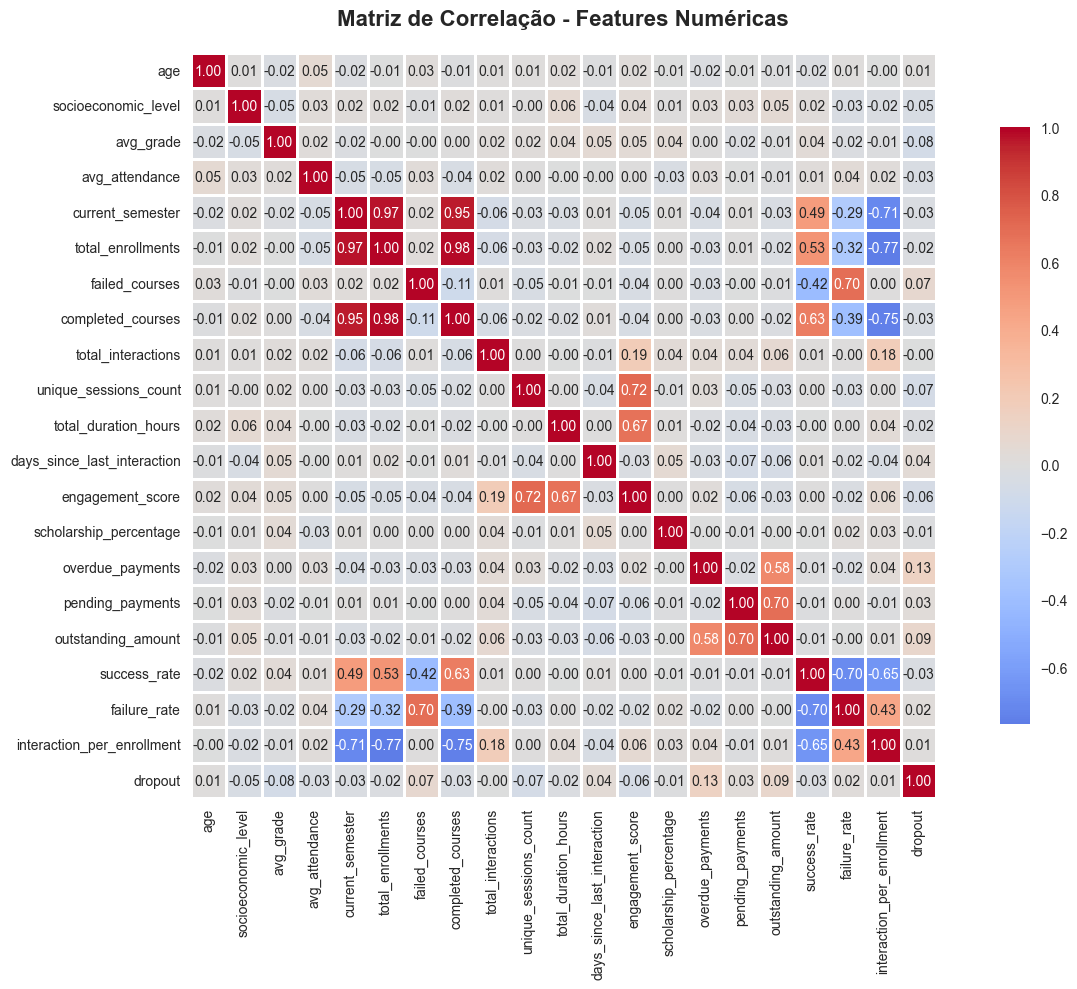

In [7]:
# Selecionar features numéricas
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('dropout')  # Remover target

# Matriz de correlação
correlation_matrix = df[numeric_features + ['dropout']].corr()

# Visualizar correlação com target
correlation_with_target = correlation_matrix['dropout'].sort_values(ascending=False)
print("📊 Correlação das Features com Evasão:")
print(correlation_with_target.drop('dropout'))

# Heatmap de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Features Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


## 5. Insights e Conclusões da EDA


In [8]:
print("🔍 PRINCIPAIS INSIGHTS DA EDA:\n")
print("1. Distribuição da Evasão:")
print(f"   - Taxa de evasão: {df['dropout'].mean()*100:.2f}%")
print(f"   - Total de evasões: {df['dropout'].sum()}")
print(f"   - Total de não evasões: {(df['dropout'] == 0).sum()}\n")

print("2. Features Mais Correlacionadas com Evasão:")
top_correlations = correlation_with_target.drop('dropout').head(5)
for feature, corr in top_correlations.items():
    print(f"   - {feature}: {corr:.3f}")

# Verificar balanceamento
print(f"\n3. Balanceamento da Classe Target:")
print(f"   - Proporção Não Evasão: {(df['dropout'] == 0).mean()*100:.2f}%")
print(f"   - Proporção Evasão: {df['dropout'].mean()*100:.2f}%")


🔍 PRINCIPAIS INSIGHTS DA EDA:

1. Distribuição da Evasão:
   - Taxa de evasão: 12.70%
   - Total de evasões: 127
   - Total de não evasões: 873

2. Features Mais Correlacionadas com Evasão:
   - overdue_payments: 0.132
   - outstanding_amount: 0.092
   - failed_courses: 0.073
   - days_since_last_interaction: 0.043
   - pending_payments: 0.031

3. Balanceamento da Classe Target:
   - Proporção Não Evasão: 87.30%
   - Proporção Evasão: 12.70%
